In [1]:
import pandas as pd
import numpy as np
import requests, json
import time
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [10]:
df = pd.read_csv('D:/공공데이터일경험수련생(9월)/data/raw/은행점포현황/2022년_6월말.csv',encoding='CP949')

In [11]:
df.head()

,은행명(1),지로코드(2),점포명(3),지점/출장소(4),점포형태(대)(5),점포형태(소)(6),모점명(7),영업본부(8),특/광/도(9),구/시/군(10),...,건물번호 등(13),도로명(14),개점일(15),전화번호(16),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,산업은행,0027025,강남,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,...,947-3,영동대로 421,1992-08-24,02-560-0300,NaN,NaN,NaN,NaN,NaN,NaN
1,산업은행,0027054,도곡,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,...,467-7,남부순환로 2803,2005-05-30,02-3498-3800,NaN,NaN,NaN,NaN,NaN,NaN
2,산업은행,0027083,반포,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,...,18-3,반포대로 287,2011-01-24,02-3488-8500,NaN,NaN,NaN,NaN,NaN,NaN
3,산업은행,0027041,서초,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,...,1319-6,서초대로78길 5,1996-04-29,02-3488-7500,NaN,NaN,NaN,NaN,NaN,NaN
4,산업은행,0023113,압구정,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,...,611,논현로 878,1986-11-12,02-3218-0900,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.iloc[:,0:16]

,은행명(1),지로코드(2),점포명(3),지점/출장소(4),점포형태(대)(5),점포형태(소)(6),모점명(7),영업본부(8),특/광/도(9),구/시/군(10),구/읍/면/동(11),말단행정구역(12),건물번호 등(13),도로명(14),개점일(15),전화번호(16)
0,산업은행,0027025,강남,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,대치동,NaN,947-3,영동대로 421,1992-08-24,02-560-0300
1,산업은행,0027054,도곡,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,도곡동,NaN,467-7,남부순환로 2803,2005-05-30,02-3498-3800
2,산업은행,0027083,반포,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,반포동,NaN,18-3,반포대로 287,2011-01-24,02-3488-8500
3,산업은행,0027041,서초,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,서초동,NaN,1319-6,서초대로78길 5,1996-04-29,02-3488-7500
4,산업은행,0023113,압구정,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,신사동,NaN,611,논현로 878,1986-11-12,02-3218-0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,경남은행,0397580,마곡,NaN,기업,NaN,NaN,수도권,서울특별시,강서구,마곡동,-,774-4 마곡센트럴타워1 2층 204~207호,공항대로 227,2017-08-07,02-2623-5070
5914,경남은행,0397593,성남위례,NaN,기업,NaN,NaN,수도권,경기도,성남시,수정구,창곡동,"562 아이페리온 2층 205호, 206호",위례광장로 19,2017-08-07,031-778-0000
5915,경남은행,0397603,동탄,NaN,기업,NaN,NaN,수도권,경기도,화성시,오산동,-,"369-2 동탄역리치안 205호,206호",동탄대로 495,2017-08-07,031-778-0020
5916,경남은행,0397629,하남,NaN,기업,NaN,NaN,수도권,경기도,하남시,망월동,-,1116-1,미사강변동로 79,2019-07-01,031-778-0040


In [13]:
df = df.iloc[:,0:16]

In [14]:
df.head()

,은행명(1),지로코드(2),점포명(3),지점/출장소(4),점포형태(대)(5),점포형태(소)(6),모점명(7),영업본부(8),특/광/도(9),구/시/군(10),구/읍/면/동(11),말단행정구역(12),건물번호 등(13),도로명(14),개점일(15),전화번호(16)
0,산업은행,0027025,강남,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,대치동,NaN,947-3,영동대로 421,1992-08-24,02-560-0300
1,산업은행,0027054,도곡,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,도곡동,NaN,467-7,남부순환로 2803,2005-05-30,02-3498-3800
2,산업은행,0027083,반포,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,반포동,NaN,18-3,반포대로 287,2011-01-24,02-3488-8500
3,산업은행,0027041,서초,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,서초동,NaN,1319-6,서초대로78길 5,1996-04-29,02-3488-7500
4,산업은행,0023113,압구정,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,신사동,NaN,611,논현로 878,1986-11-12,02-3218-0900


In [73]:
df.count()

은행명(1)         5918
지로코드(2)        5918
점포명(3)         5918
지점/출장소(4)      5793
점포형태(대)(5)     3110
 점포형태(소)(6)     848
모점명(7)         2486
영업본부(8)        5876
특/광/도(9)       5918
구/시/군(10)      5892
구/읍/면/동(11)    5683
말단행정구역(12)     2189
건물번호 등(13)     5913
도로명(14)        5918
개점일(15)        5917
전화번호(16)       5915
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   은행명(1)       5918 non-null   object
 1   지로코드(2)      5918 non-null   object
 2   점포명(3)       5918 non-null   object
 3   지점/출장소(4)    5793 non-null   object
 4   점포형태(대)(5)   3110 non-null   object
 5    점포형태(소)(6)  848 non-null    object
 6   모점명(7)       2486 non-null   object
 7   영업본부(8)      5876 non-null   object
 8   특/광/도(9)     5918 non-null   object
 9   구/시/군(10)    5892 non-null   object
 10  구/읍/면/동(11)  5683 non-null   object
 11  말단행정구역(12)   2189 non-null   object
 12  건물번호 등(13)   5913 non-null   object
 13  도로명(14)      5918 non-null   object
 14  개점일(15)      5917 non-null   object
 15  전화번호(16)     5915 non-null   object
dtypes: object(16)
memory usage: 739.9+ KB


In [75]:
df['특/광/도(9)'].value_counts(ascending = False)

서울특별시      1475
경기도        1007
부산광역시       452
서울          307
경상남도        296
대구광역시       281
경상북도        220
인천광역시       220
전라북도        178
광주광역시       162
경기          159
충청남도        156
전라남도        153
대전광역시       138
울산광역시       109
강원도         107
충청북도        106
제주특별자치도      66
인천           51
세종특별자치시      39
부산           32
충북           29
강원           27
대구           20
경북           19
경남           17
충남           16
대전           13
울산           13
광주           11
전남           10
전북            7
제주            5
세종            5
제주도           5
대구광역시         3
경기도           2
울산시           1
전라북도          1
Name: 특/광/도(9), dtype: int64

In [15]:
df.columns
df.columns =['은행명', '지로코드', '점포명', '지점/출장소', '점포형태(대)', ' 점포형태(소)',
       '모점명', '영업본부', '특/광/도', '구/시/군', '구/읍/면/동',
       '말단행정구역', '건물번호 등', '도로명', '개점일', '전화번호']
#for i in range(len(df)):
df.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
0,산업은행,0027025,강남,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,대치동,NaN,947-3,영동대로 421,1992-08-24,02-560-0300
1,산업은행,0027054,도곡,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,도곡동,NaN,467-7,남부순환로 2803,2005-05-30,02-3498-3800
2,산업은행,0027083,반포,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,반포동,NaN,18-3,반포대로 287,2011-01-24,02-3488-8500
3,산업은행,0027041,서초,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,서초동,NaN,1319-6,서초대로78길 5,1996-04-29,02-3488-7500
4,산업은행,0023113,압구정,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,신사동,NaN,611,논현로 878,1986-11-12,02-3218-0900


In [81]:
#df.loc[df['특/광/도'] == '서울특별시'] = '서울'

df = df.replace({'특/광/도' : '서울'}, '서울특별시')
df = df.replace({'특/광/도' : '대구'}, '대구광역시')
df = df.replace({'특/광/도' : '울산'}, '울산광역시')
df = df.replace({'특/광/도' : '부산'}, '부산광역시')
df = df.replace({'특/광/도' : '인천'}, '인천광역시')
df = df.replace({'특/광/도' : '충남'}, '충청남도')
df = df.replace({'특/광/도' : '경북'}, '경상북도')
df = df.replace({'특/광/도' : '경남'}, '경상남도')
df = df.replace({'특/광/도' : '대전'}, '대전광역시')
df = df.replace({'특/광/도' : '제주'}, '제주특별자치도')
df = df.replace({'특/광/도' : '울산시'}, '울산광역시')
df = df.replace({'특/광/도' : '세종'}, '세종특별자치시')
df = df.replace({'특/광/도' : '광주'}, '광주광역시')
df = df.replace({'특/광/도' : '충북'}, '충청북도')
df = df.replace({'특/광/도' : '전남'}, '전라남도')
df = df.replace({'특/광/도' : '전북'}, '전라북도')
df = df.replace({'특/광/도' : '제주도'}, '제주특별자치도')
df = df.replace({'특/광/도' : '강원'}, '강원도')
df = df.replace({'특/광/도' : '대구광역시'}, '대구광역시')
df = df.replace({'특/광/도' : '경기도'}, '경기도')
df = df.replace({'특/광/도' : '경기'}, '경기도')

In [82]:
df.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
0,산업은행,0027025,강남,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,대치동,NaN,947-3,영동대로 421,1992-08-24,02-560-0300
1,산업은행,0027054,도곡,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,도곡동,NaN,467-7,남부순환로 2803,2005-05-30,02-3498-3800
2,산업은행,0027083,반포,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,반포동,NaN,18-3,반포대로 287,2011-01-24,02-3488-8500
3,산업은행,0027041,서초,지점,기업,NaN,NaN,강남지역본부,서울특별시,서초구,서초동,NaN,1319-6,서초대로78길 5,1996-04-29,02-3488-7500
4,산업은행,0023113,압구정,지점,기업,NaN,NaN,강남지역본부,서울특별시,강남구,신사동,NaN,611,논현로 878,1986-11-12,02-3218-0900


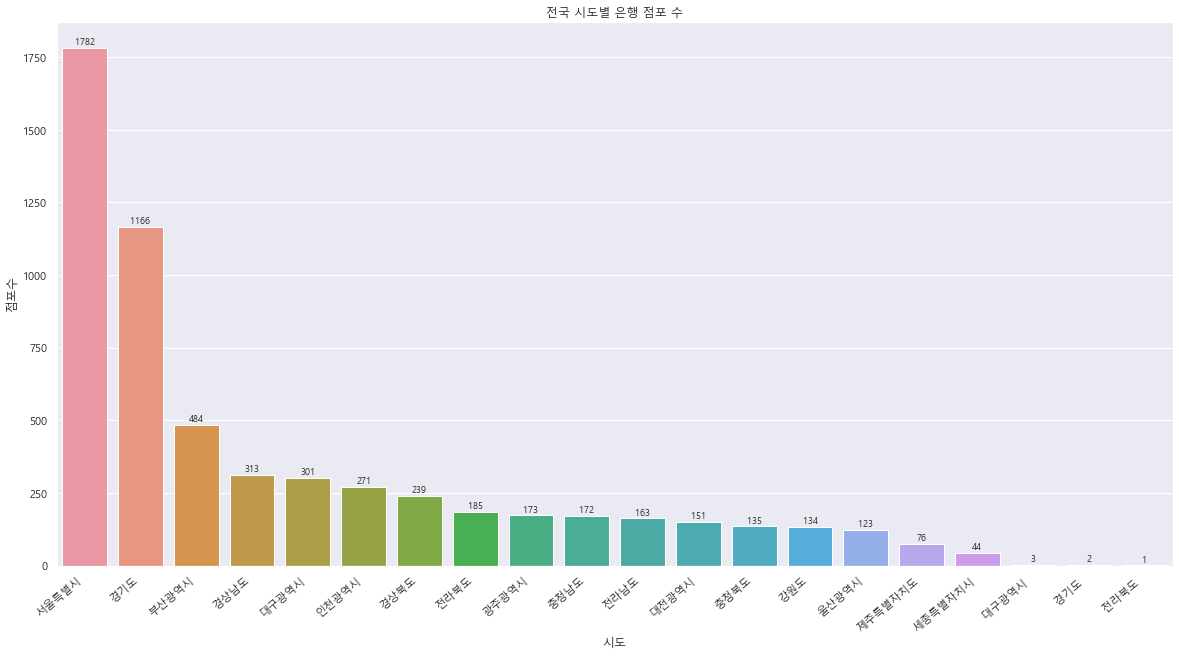

In [83]:
# 은행 지점 지역별로 시각화 - matplotlib이용
#sido = df['특/광/도(9)'].value_counts()
#sido.title('전국 시도별 은행 점포 수')
#plt.xlabel('시도')
#plt.ylabel('점포수')
#plt.barh()  #옆으로눕혀서
#plt.show()

ax = sns.countplot(x='특/광/도',
                   data = df,
                   order= df['특/광/도'].value_counts().index)

plt.rcParams['figure.figsize'] = [20, 10] #크기 지정
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2. , height +10, height, ha = 'center', size = 9)

plt.title('전국 시도별 은행 점포 수')
plt.xlabel('시도')
plt.ylabel('점포수')
plt.show()

#서울특별시 > 서울 이런식으로 전처리필요함

In [48]:
df['은행명'].value_counts(ascending=False)

NH농협은행     1118
국민은행        878
신한은행        740
우리은행        728
중소기업은행      627
하나은행        597
부산은행        212
대구은행        210
SC제일은행      181
광주은행        140
수협은행        128
경남은행        126
전북은행         90
산업은행         60
한국씨티은행       39
제주은행         31
한국수출입은행      13
Name: 은행명, dtype: int64

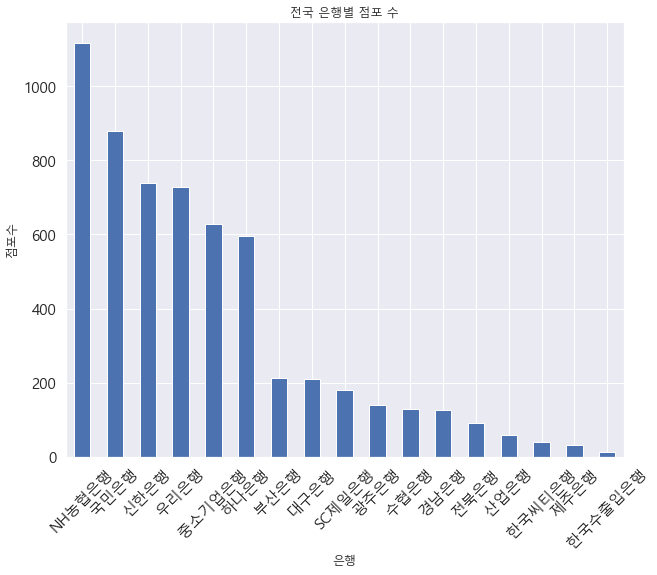

In [85]:
# 은행 지점 수 시각화
bank = df['은행명'].value_counts(ascending=False)
bank.plot.bar()
bank.plot.bar(grid=True, figsize=(10,8), fontsize=15)
plt.xticks(rotation=45)

plt.title('전국 은행별 점포 수')
plt.xlabel('은행')
plt.ylabel('점포수')
plt.show()

#x축안잘리게
#plt.tight_layout()

# 그래프저장
#plt.savefig(f'./bar_plot.jpg', dpi=300)

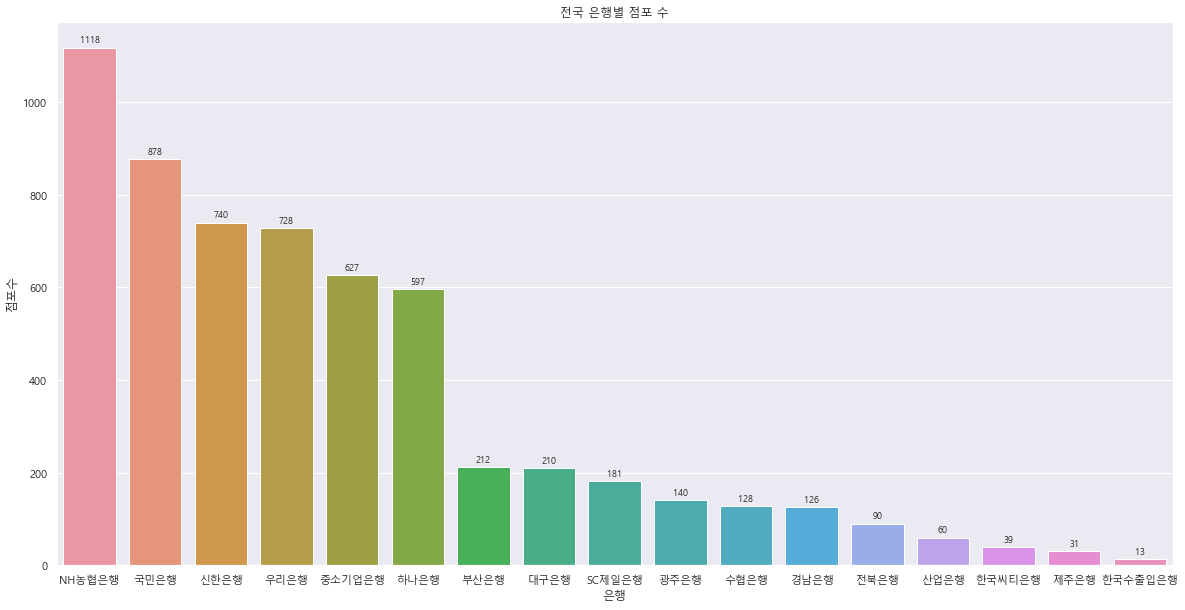

In [86]:
bk = sns.countplot(x='은행명',
                   data = df,
                   order = df['은행명'].value_counts().index)


for p in bk.patches:
    height = p.get_height()
    bk.text(p.get_x() + p.get_width() / 2. , height +10, height, ha = 'center', size = 9)
    
plt.title('전국 은행별 점포 수')
plt.xlabel('은행')
plt.ylabel('점포수')
plt.show()

In [13]:
df['구/시/군'].value_counts(ascending=False)

강남구        278
중구         267
서구         180
서초구        161
성남시        144
          ... 
조치원읍         1
보람동          1
반곡동          1
나성동          1
성남시 분당구      1
Name: 구/시/군(10), Length: 227, dtype: int64

In [14]:
df['구/읍/면/동'].value_counts(ascending=False) #가장 많이 있는 지점

분당구     93
서초동     71
역삼동     59
여의도동    59
단원구     57
        ..
성정동      1
신부동      1
안서동      1
의림동      1
정촌면      1
Name: 구/읍/면/동(11), Length: 1558, dtype: int64

In [15]:
df['구/읍/면/동'].value_counts(ascending=True) #가장 적게 있는 지점

보문동2가     1
상봉2동      1
묵1동       1
주안4동      1
관문동       1
         ..
단원구      57
역삼동      59
여의도동     59
서초동      71
분당구      93
Name: 구/읍/면/동(11), Length: 1558, dtype: int64

In [16]:
df['구/읍/면/동(11)'].count

<bound method Series.count of 0        대치동
1        도곡동
2       반포동 
3        서초동
4        신사동
        ... 
5913     마곡동
5914     수정구
5915     오산동
5916     망월동
5917     정왕동
Name: 구/읍/면/동(11), Length: 5918, dtype: object>

## 4대 시중은행 2022 6월기준

In [94]:
sinhan = df.groupby(df['은행명']).get_group('신한은행')
sinhan.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
1178,신한은행,881672,ASE코리아(출),출장소,일반,출장소,파주금융센터,경기북서,경기도,파주시,문발동,NaN,494,산업단지길 76,1997-10-06,031-943-8716
1179,신한은행,886981,FI영업1부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,2018-01-02,02-756-0506
1180,신한은행,262534,FI영업2부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,1999-01-02,02-761-4400
1181,신한은행,262495,FI영업3부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,1992-09-23,02-6264-3001
1182,신한은행,215989,GS타워,지점,일반,리테일,,강남,서울특별시,강남구,역삼동,NaN,679,논현로 508,1999-10-11,02-508-5353
1183,신한은행,218465,GS타워대기업금융센터,지점,기업,대기업,,강남본부,서울특별시,강남구,역삼동,NaN,679,논현로 508,2004-01-14,02-508-8181
1184,신한은행,219079,KBS,지점,일반,리테일,,강서,서울특별시,영등포구,여의도동,NaN,18,여의공원로 13,1984-08-03,02-780-1146
1185,신한은행,883065,KBS미디어센터(출),출장소,일반,출장소,KBS,강서,서울특별시,마포구,상암동,NaN,1652,매봉산로 45,2008-01-10,02-6939-8280
1186,신한은행,884080,LG디스플레이(출),출장소,일반,출장소,파주금융센터,경기북서,경기도,파주시,월롱면,덕은리,1239,엘지로 245,2011-07-25,031-8074-9142
1187,신한은행,886978,LG사이언스파크(출),출장소,일반,출장소,마곡역금융센터,강서,서울특별시,강서구,마곡동,NaN,789,마곡중앙10로 70,2018-01-02,02-6023-9840


In [95]:
sinhan.tail(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
1908,신한은행,217204,홍천,지점,일반,리테일,,강원,강원도,홍천군,홍천읍,신장대리,26359,번영로 42,1971-07-13,033-432-9001
1909,신한은행,263520,화곡역,지점,일반,리테일,,강서,서울특별시,강서구,화곡동,NaN,1065-22,강서로 173,1989-10-13,02-2692-7022
1910,신한은행,214744,화도금융센터,지점,일반,금융센터,,동부,경기도,남양주시,화도읍,창현리,491-2,마석중앙로 19725,1995-06-22,031-593-1300
1911,신한은행,265188,화명동,지점,일반,리테일,,부산/경남,부산광역시,북구,화명동,NaN,2277-4,금곡대로 287,2006-04-14,051-361-7400
1912,신한은행,266828,화서동,지점,일반,리테일,,경기중부,경기도,수원시,팔달구,화서동,725-5,일월로22번길 18,2002-04-23,031-298-4477
1913,신한은행,215264,화정역금융센터,지점,일반,금융센터,,경기북서,경기도,고양시,덕양구,화정동,970-3,화신로272번길 67,1990-11-21,031-963-8413
1914,신한은행,264228,황금네거리,지점,일반,리테일,,대구/경북,대구광역시,수성구,두산동,NaN,113,동대구로 95,2006-08-01,053-763-8181
1915,신한은행,213761,효자동,지점,일반,리테일,,서부,서울특별시,종로구,통인동,NaN,1-2,자하문로 61,1982-12-28,02-739-9988
1916,신한은행,214867,후곡마을,지점,일반,리테일,,경기북서,경기도,고양시,일산서구,일산동,1064-2,일산로 566,1995-07-26,031-911-3984
1917,신한은행,217149,후평동,지점,일반,리테일,,강원,강원도,춘천시,후평동,NaN,701-8,후석로 326,1988-12-16,033-255-3871


In [96]:
s2 = sinhan.copy()

In [98]:
# df합쳐서 주소 만들어줌
s2['주소'] = s2['특/광/도']+ " " + s2['구/시/군'] +" "+ s2['구/읍/면/동'] + " "+ s2['도로명']

In [99]:
s2.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
1178,신한은행,881672,ASE코리아(출),출장소,일반,출장소,파주금융센터,경기북서,경기도,파주시,문발동,NaN,494,산업단지길 76,1997-10-06,031-943-8716,경기도 파주시 문발동 산업단지길 76
1179,신한은행,886981,FI영업1부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,2018-01-02,02-756-0506,서울특별시 영등포구 여의도동 국제금융로2길 17
1180,신한은행,262534,FI영업2부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,1999-01-02,02-761-4400,서울특별시 영등포구 여의도동 국제금융로2길 17
1181,신한은행,262495,FI영업3부,지점,기업,대기업,,FI본부,서울특별시,영등포구,여의도동,NaN,25,국제금융로2길 17,1992-09-23,02-6264-3001,서울특별시 영등포구 여의도동 국제금융로2길 17
1182,신한은행,215989,GS타워,지점,일반,리테일,,강남,서울특별시,강남구,역삼동,NaN,679,논현로 508,1999-10-11,02-508-5353,서울특별시 강남구 역삼동 논현로 508


In [26]:
final_add = []
def get_coordinate(address): # 주소를 입력받음
    result = "" 
    address = str(address)
 
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address # 카카오 api 서버스를 이용하여 접근
    rest_api_key = '키' # 사용자 api key
    header = {'Authorization': 'KakaoAK ' + rest_api_key} 

    r = requests.get(url, headers=header) 
 
    if r.status_code == 200: # 정보를 오류없이 받아왔다면
        if len(r.json()['documents']) != 0: # 길이가 0이 아니라면
            try : 
                result_address = r.json()["documents"][0]["address"]
                result = (result_address["y"],result_address["x"])  # 좌표 정보에 접근
                final_add.append(result)
            except:  # 예외처리
                result = np.nan
            
        else: # 길이가 0인경우 na처리
            result = np.nan
            final_add.append(result)
    else:
        result = "ERROR[" + str(r.status_code) + "]"
    return result # 좌표를 반환

get_coordinate('경남 창원시 진해구 신항동로 141 애플타운헤리티지 102,201,202호')

('35.0883596342854', '128.813489363215')

In [108]:
xy = []
for address in s2['주소']:
    xy.append(get_coordinate(address))

sin3 = pd.DataFrame(xy, columns =['lat','long'])

In [123]:
sin3.head(20)

,lat,long
0,37.728662137888,126.71316617128
1,37.5240626320895,126.926030690974
2,37.5240626320895,126.926030690974
3,37.5240626320895,126.926030690974
4,37.5019949322814,127.037336400239
5,37.5019949322814,127.037336400239
6,37.5259698897016,126.916716838156
7,37.5765125877795,126.890992094988
8,37.8158852217591,126.756818111533
9,37.563047307466,126.834429972258


In [121]:
sin3.isnull().sum()

lat     20
long    20
dtype: int64

In [127]:
s2.reset_index(drop=False, inplace =True)

#df병합
result = pd.concat([s2,sin3], axis=1)

In [129]:
result.head(10)

,level_0,index,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,...,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소,lat,long
0,0,1178,신한은행,881672,ASE코리아(출),출장소,일반,출장소,파주금융센터,경기북서,...,파주시,문발동,NaN,494,산업단지길 76,1997-10-06,031-943-8716,경기도 파주시 문발동 산업단지길 76,37.728662137888,126.71316617128
1,1,1179,신한은행,886981,FI영업1부,지점,기업,대기업,,FI본부,...,영등포구,여의도동,NaN,25,국제금융로2길 17,2018-01-02,02-756-0506,서울특별시 영등포구 여의도동 국제금융로2길 17,37.5240626320895,126.926030690974
2,2,1180,신한은행,262534,FI영업2부,지점,기업,대기업,,FI본부,...,영등포구,여의도동,NaN,25,국제금융로2길 17,1999-01-02,02-761-4400,서울특별시 영등포구 여의도동 국제금융로2길 17,37.5240626320895,126.926030690974
3,3,1181,신한은행,262495,FI영업3부,지점,기업,대기업,,FI본부,...,영등포구,여의도동,NaN,25,국제금융로2길 17,1992-09-23,02-6264-3001,서울특별시 영등포구 여의도동 국제금융로2길 17,37.5240626320895,126.926030690974
4,4,1182,신한은행,215989,GS타워,지점,일반,리테일,,강남,...,강남구,역삼동,NaN,679,논현로 508,1999-10-11,02-508-5353,서울특별시 강남구 역삼동 논현로 508,37.5019949322814,127.037336400239
5,5,1183,신한은행,218465,GS타워대기업금융센터,지점,기업,대기업,,강남본부,...,강남구,역삼동,NaN,679,논현로 508,2004-01-14,02-508-8181,서울특별시 강남구 역삼동 논현로 508,37.5019949322814,127.037336400239
6,6,1184,신한은행,219079,KBS,지점,일반,리테일,,강서,...,영등포구,여의도동,NaN,18,여의공원로 13,1984-08-03,02-780-1146,서울특별시 영등포구 여의도동 여의공원로 13,37.5259698897016,126.916716838156
7,7,1185,신한은행,883065,KBS미디어센터(출),출장소,일반,출장소,KBS,강서,...,마포구,상암동,NaN,1652,매봉산로 45,2008-01-10,02-6939-8280,서울특별시 마포구 상암동 매봉산로 45,37.5765125877795,126.890992094988
8,8,1186,신한은행,884080,LG디스플레이(출),출장소,일반,출장소,파주금융센터,경기북서,...,파주시,월롱면,덕은리,1239,엘지로 245,2011-07-25,031-8074-9142,경기도 파주시 월롱면 엘지로 245,37.8158852217591,126.756818111533
9,9,1187,신한은행,886978,LG사이언스파크(출),출장소,일반,출장소,마곡역금융센터,강서,...,강서구,마곡동,NaN,789,마곡중앙10로 70,2018-01-02,02-6023-9840,서울특별시 강서구 마곡동 마곡중앙10로 70,37.563047307466,126.834429972258


In [134]:
result.isnull().sum()

level_0       0
index         0
은행명           0
지로코드          0
점포명           0
지점/출장소        0
점포형태(대)       0
 점포형태(소)      0
모점명           0
영업본부          0
특/광/도         0
구/시/군         0
구/읍/면/동       4
말단행정구역      583
건물번호 등        0
도로명           0
개점일           0
전화번호          0
주소            4
lat          20
long         20
dtype: int64

In [135]:
result.to_csv('신한은행_geo.csv', index=False, encoding='euc-kr')

## 하나은행 전국 지점

In [136]:
hana = df.groupby(df['은행명']).get_group('하나은행')
hana.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
2827,하나은행,0811011,영업1부,영업점,일반,NaN,NaN,서울11,서울특별시,중구,을지로1가,NaN,101-1 하나은행지하1층,을지로35,1991-07-15,02-754-1111
2828,하나은행,0811024,삼성역금융센터,영업점,일반,NaN,NaN,서울1,서울특별시,강남구,대치동,NaN,943-19 신안빌딩,"테헤란로 512 (대치동, 신안빌딩)",1991-07-15,02-562-1111
2829,하나은행,0811037,서초,영업점,일반,NaN,NaN,서울4,서울특별시,서초구,서초3동,NaN,1598-3 르네상스오피스텔,서초중앙로 69 (서초동),1991-08-06,02-583-1111
2830,하나은행,0811053,LS용산타워,영업점,일반,NaN,NaN,서울12,서울특별시,용산구,한강로2가,NaN,191,"한강대로 92 (한강로2가, LS용산타워)",1991-08-01,02-3272-1111
2831,하나은행,0811066,여의도,영업점,일반,NaN,NaN,서울8,서울특별시,영등포구,여의도동,NaN,43-2,국제금융로 72 (여의도동),1991-10-02,02-707-1111
2832,하나은행,0811095,서울대입구역,영업점,일반,NaN,NaN,서울5,서울특별시,관악구,봉천7동,NaN,853-1 남경도빌딩 1F,"남부순환로 1836 (봉천동, 남경도빌딩)",1991-10-23,02-883-1111
2833,하나은행,0811121,청담동,영업점,일반,NaN,NaN,서울1,서울특별시,강남구,청담1동,NaN,133-3 화천회관빌딩 1F,영동대로 702 (청담동),1991-12-17,02-579-1111
2834,하나은행,0811134,용산전자상가,영업점,일반,NaN,NaN,서울12,서울특별시,용산구,한강로3가,NaN,1-1외 나진상가 14동 지하1층,"청파로 109 (한강로3가, 나진상가)",1987-08-24,02-711-1111
2835,하나은행,0811150,강남역금융센터,영업점,일반,NaN,NaN,서울4,서울특별시,서초구,서초2동,NaN,1319-11 두산베어스텔 1F,"강남대로 381 (서초동, 두산베어스텔)",1992-04-29,02-598-1111
2836,하나은행,0811192,송파,영업점,일반,NaN,NaN,서울6,서울특별시,송파구,오금동,NaN,45 삼부르네상스빌 1F,"오금로 307 (오금동, 삼부르네상스빌)",1992-06-12,02-404-1111


In [139]:
h1 = hana.copy()

In [140]:
# df합쳐서 주소 만들어줌
h1['주소'] = h1['특/광/도']+ " " + h1['구/시/군'] +" "+ h1['구/읍/면/동'] + " "+ h1['도로명']

In [142]:
xy = []
for address in h1['주소']:
    xy.append(get_coordinate(address))

h2 = pd.DataFrame(xy, columns =['lat','long'])

In [143]:
h2.head(20)

,lat,long
0,37.5664918220199,126.981865819602
1,37.5072456831616,127.059248173221
2,37.4878376687184,127.014313467711
3,37.5281759339792,126.96752270323
4,37.5211195361581,126.930836281461
5,37.4805323031355,126.953743537738
6,37.520479644194,127.05757608142
7,37.5336766816291,126.963363198566
8,37.4966853439159,127.027693858427
9,37.5034739040838,127.126673907784


In [145]:
h2.isnull().sum()

lat     12
long    12
dtype: int64

In [147]:
# 인덱스 재배열
h1.reset_index(drop=False, inplace=True)

In [148]:
# df병합
result = pd.concat([h1,h2], axis=1)
result.head(10)

,index,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소,lat,long
0,2827,하나은행,0811011,영업1부,영업점,일반,NaN,NaN,서울11,서울특별시,중구,을지로1가,NaN,101-1 하나은행지하1층,을지로35,1991-07-15,02-754-1111,서울특별시 중구 을지로1가 을지로35,37.5664918220199,126.981865819602
1,2828,하나은행,0811024,삼성역금융센터,영업점,일반,NaN,NaN,서울1,서울특별시,강남구,대치동,NaN,943-19 신안빌딩,"테헤란로 512 (대치동, 신안빌딩)",1991-07-15,02-562-1111,"서울특별시 강남구 대치동 테헤란로 512 (대치동, 신안빌딩)",37.5072456831616,127.059248173221
2,2829,하나은행,0811037,서초,영업점,일반,NaN,NaN,서울4,서울특별시,서초구,서초3동,NaN,1598-3 르네상스오피스텔,서초중앙로 69 (서초동),1991-08-06,02-583-1111,서울특별시 서초구 서초3동 서초중앙로 69 (서초동),37.4878376687184,127.014313467711
3,2830,하나은행,0811053,LS용산타워,영업점,일반,NaN,NaN,서울12,서울특별시,용산구,한강로2가,NaN,191,"한강대로 92 (한강로2가, LS용산타워)",1991-08-01,02-3272-1111,"서울특별시 용산구 한강로2가 한강대로 92 (한강로2가, LS용산타워)",37.5281759339792,126.96752270323
4,2831,하나은행,0811066,여의도,영업점,일반,NaN,NaN,서울8,서울특별시,영등포구,여의도동,NaN,43-2,국제금융로 72 (여의도동),1991-10-02,02-707-1111,서울특별시 영등포구 여의도동 국제금융로 72 (여의도동),37.5211195361581,126.930836281461
5,2832,하나은행,0811095,서울대입구역,영업점,일반,NaN,NaN,서울5,서울특별시,관악구,봉천7동,NaN,853-1 남경도빌딩 1F,"남부순환로 1836 (봉천동, 남경도빌딩)",1991-10-23,02-883-1111,"서울특별시 관악구 봉천7동 남부순환로 1836 (봉천동, 남경도빌딩)",37.4805323031355,126.953743537738
6,2833,하나은행,0811121,청담동,영업점,일반,NaN,NaN,서울1,서울특별시,강남구,청담1동,NaN,133-3 화천회관빌딩 1F,영동대로 702 (청담동),1991-12-17,02-579-1111,서울특별시 강남구 청담1동 영동대로 702 (청담동),37.520479644194,127.05757608142
7,2834,하나은행,0811134,용산전자상가,영업점,일반,NaN,NaN,서울12,서울특별시,용산구,한강로3가,NaN,1-1외 나진상가 14동 지하1층,"청파로 109 (한강로3가, 나진상가)",1987-08-24,02-711-1111,"서울특별시 용산구 한강로3가 청파로 109 (한강로3가, 나진상가)",37.5336766816291,126.963363198566
8,2835,하나은행,0811150,강남역금융센터,영업점,일반,NaN,NaN,서울4,서울특별시,서초구,서초2동,NaN,1319-11 두산베어스텔 1F,"강남대로 381 (서초동, 두산베어스텔)",1992-04-29,02-598-1111,"서울특별시 서초구 서초2동 강남대로 381 (서초동, 두산베어스텔)",37.4966853439159,127.027693858427
9,2836,하나은행,0811192,송파,영업점,일반,NaN,NaN,서울6,서울특별시,송파구,오금동,NaN,45 삼부르네상스빌 1F,"오금로 307 (오금동, 삼부르네상스빌)",1992-06-12,02-404-1111,"서울특별시 송파구 오금동 오금로 307 (오금동, 삼부르네상스빌)",37.5034739040838,127.126673907784


In [150]:
result.isnull().sum()

index         0
은행명           0
지로코드          0
점포명           0
지점/출장소        0
점포형태(대)       0
 점포형태(소)    597
모점명         534
영업본부          0
특/광/도         0
구/시/군         0
구/읍/면/동       0
말단행정구역      483
건물번호 등        0
도로명           0
개점일           0
전화번호          0
주소            0
lat          12
long         12
dtype: int64

In [151]:
result.to_csv('하나은행_geo.csv', index=False, encoding='euc-kr')

## 한국시티은행 전국 지점

In [242]:
city = df.groupby(df['은행명']).get_group('한국씨티은행')
city.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
4929,한국씨티은행,277367,커머셜기업금융2센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,2012-06-01,02-520-7311
4930,한국씨티은행,271842,강남대기업업무센터,지점,기업,NaN,NaN,기업금융업무부,서울특별시,강남구,대치동,NaN,테헤란로,508,2002-01-28,02-566-2766
4931,한국씨티은행,271635,강남영업부,지점,일반,NaN,NaN,여신센터영업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,1996-02-27,02-557-8400
4932,한국씨티은행,273219,경수영업부,지점,일반,NaN,NaN,여신센터영업본부,경기도,수원시,팔달구,인계동,권광로,178,1989-11-24,031-230-3000
4933,한국씨티은행,277338,경기중부기업금융센터,지점,기업,커머셜,NaN,커머셜사업본부,경기도,수원시,팔달구,인계동,권광로,178,2012-06-01,031-475-5335
4934,한국씨티은행,274218,경인영업부,지점,일반,NaN,NaN,여신센터영업본부,인천광역시,남동구,구월동,NaN,인주대로,585,1998-10-07,032-420-5500
4935,한국씨티은행,275013,광주,지점,일반,NaN,NaN,리테일영업점영업본부,광주광역시,동구,금남로5가,NaN,금남로,181,1988-07-15,062-224-0709
4936,한국씨티은행,277312,커머셜기업금융1센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,종로구,신문로2가,NaN,새문안로,50,2012-06-01,02-3455-2275
4937,한국씨티은행,276038,대구센터,지점,일반,NaN,NaN,WM센터영업본부,대구광역시,수성구,수성동4가,NaN,수성로,412,1996-06-04,053-743-8400
4938,한국씨티은행,274030,대전중앙,지점,일반,NaN,NaN,리테일영업점영업본부,대전광역시,서구,둔산동,NaN,문예로,67,1995-05-26,042-487-7900


In [243]:
city1 = city.copy()

In [245]:
# df합쳐서 주소 만들어줌
city1['주소'] = city1['특/광/도']+ " " + city1['구/시/군'] +" "+ city1['구/읍/면/동'] + " "+ city1['건물번호 등']+" "+ city1['도로명']

In [246]:
city1.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
4929,한국씨티은행,277367,커머셜기업금융2센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,2012-06-01,02-520-7311,서울특별시 강남구 대치동 테헤란로 508
4930,한국씨티은행,271842,강남대기업업무센터,지점,기업,NaN,NaN,기업금융업무부,서울특별시,강남구,대치동,NaN,테헤란로,508,2002-01-28,02-566-2766,서울특별시 강남구 대치동 테헤란로 508
4931,한국씨티은행,271635,강남영업부,지점,일반,NaN,NaN,여신센터영업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,1996-02-27,02-557-8400,서울특별시 강남구 대치동 테헤란로 508
4932,한국씨티은행,273219,경수영업부,지점,일반,NaN,NaN,여신센터영업본부,경기도,수원시,팔달구,인계동,권광로,178,1989-11-24,031-230-3000,경기도 수원시 팔달구 권광로 178
4933,한국씨티은행,277338,경기중부기업금융센터,지점,기업,커머셜,NaN,커머셜사업본부,경기도,수원시,팔달구,인계동,권광로,178,2012-06-01,031-475-5335,경기도 수원시 팔달구 권광로 178
4934,한국씨티은행,274218,경인영업부,지점,일반,NaN,NaN,여신센터영업본부,인천광역시,남동구,구월동,NaN,인주대로,585,1998-10-07,032-420-5500,인천광역시 남동구 구월동 인주대로 585
4935,한국씨티은행,275013,광주,지점,일반,NaN,NaN,리테일영업점영업본부,광주광역시,동구,금남로5가,NaN,금남로,181,1988-07-15,062-224-0709,광주광역시 동구 금남로5가 금남로 181
4936,한국씨티은행,277312,커머셜기업금융1센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,종로구,신문로2가,NaN,새문안로,50,2012-06-01,02-3455-2275,서울특별시 종로구 신문로2가 새문안로 50
4937,한국씨티은행,276038,대구센터,지점,일반,NaN,NaN,WM센터영업본부,대구광역시,수성구,수성동4가,NaN,수성로,412,1996-06-04,053-743-8400,대구광역시 수성구 수성동4가 수성로 412
4938,한국씨티은행,274030,대전중앙,지점,일반,NaN,NaN,리테일영업점영업본부,대전광역시,서구,둔산동,NaN,문예로,67,1995-05-26,042-487-7900,대전광역시 서구 둔산동 문예로 67


In [247]:
# 확인
city1.isnull().sum()

은행명          0
지로코드         0
점포명          0
지점/출장소       0
점포형태(대)      0
 점포형태(소)    34
모점명         39
영업본부         0
특/광/도        0
구/시/군        0
구/읍/면/동      0
말단행정구역      30
건물번호 등       0
도로명          0
개점일          0
전화번호         0
주소           0
dtype: int64

In [248]:
city1.count()

은행명         39
지로코드        39
점포명         39
지점/출장소      39
점포형태(대)     39
 점포형태(소)     5
모점명          0
영업본부        39
특/광/도       39
구/시/군       39
구/읍/면/동     39
말단행정구역       9
건물번호 등      39
도로명         39
개점일         39
전화번호        39
주소          39
dtype: int64

In [249]:
xy = []
for address in city1['주소']:
    xy.append(get_coordinate(address))

city2 = pd.DataFrame(xy, columns =['lat','long'])

In [250]:
city2.count()

lat     39
long    39
dtype: int64

In [251]:
city2.isnull().sum()

lat     0
long    0
dtype: int64

In [252]:
city1.reset_index(drop=True,inplace=True)

In [253]:
#city1 = city1.iloc[:,1:]
city1.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
0,한국씨티은행,277367,커머셜기업금융2센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,2012-06-01,02-520-7311,서울특별시 강남구 대치동 테헤란로 508
1,한국씨티은행,271842,강남대기업업무센터,지점,기업,NaN,NaN,기업금융업무부,서울특별시,강남구,대치동,NaN,테헤란로,508,2002-01-28,02-566-2766,서울특별시 강남구 대치동 테헤란로 508
2,한국씨티은행,271635,강남영업부,지점,일반,NaN,NaN,여신센터영업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,1996-02-27,02-557-8400,서울특별시 강남구 대치동 테헤란로 508
3,한국씨티은행,273219,경수영업부,지점,일반,NaN,NaN,여신센터영업본부,경기도,수원시,팔달구,인계동,권광로,178,1989-11-24,031-230-3000,경기도 수원시 팔달구 권광로 178
4,한국씨티은행,277338,경기중부기업금융센터,지점,기업,커머셜,NaN,커머셜사업본부,경기도,수원시,팔달구,인계동,권광로,178,2012-06-01,031-475-5335,경기도 수원시 팔달구 권광로 178


In [254]:
result = pd.concat([city1,city2],axis=1)

In [255]:
result.isnull().sum()

은행명          0
지로코드         0
점포명          0
지점/출장소       0
점포형태(대)      0
 점포형태(소)    34
모점명         39
영업본부         0
특/광/도        0
구/시/군        0
구/읍/면/동      0
말단행정구역      30
건물번호 등       0
도로명          0
개점일          0
전화번호         0
주소           0
lat          0
long         0
dtype: int64

In [256]:
result.head(20)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소,lat,long
0,한국씨티은행,277367,커머셜기업금융2센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,2012-06-01,02-520-7311,서울특별시 강남구 대치동 테헤란로 508,37.5068166240241,127.057978287882
1,한국씨티은행,271842,강남대기업업무센터,지점,기업,NaN,NaN,기업금융업무부,서울특별시,강남구,대치동,NaN,테헤란로,508,2002-01-28,02-566-2766,서울특별시 강남구 대치동 테헤란로 508,37.5068166240241,127.057978287882
2,한국씨티은행,271635,강남영업부,지점,일반,NaN,NaN,여신센터영업본부,서울특별시,강남구,대치동,NaN,테헤란로,508,1996-02-27,02-557-8400,서울특별시 강남구 대치동 테헤란로 508,37.5068166240241,127.057978287882
3,한국씨티은행,273219,경수영업부,지점,일반,NaN,NaN,여신센터영업본부,경기도,수원시,팔달구,인계동,권광로,178,1989-11-24,031-230-3000,경기도 수원시 팔달구 권광로 178,37.2632779116431,127.033061027852
4,한국씨티은행,277338,경기중부기업금융센터,지점,기업,커머셜,NaN,커머셜사업본부,경기도,수원시,팔달구,인계동,권광로,178,2012-06-01,031-475-5335,경기도 수원시 팔달구 권광로 178,37.2632779116431,127.033061027852
5,한국씨티은행,274218,경인영업부,지점,일반,NaN,NaN,여신센터영업본부,인천광역시,남동구,구월동,NaN,인주대로,585,1998-10-07,032-420-5500,인천광역시 남동구 구월동 인주대로 585,37.4510261020674,126.701983543287
6,한국씨티은행,275013,광주,지점,일반,NaN,NaN,리테일영업점영업본부,광주광역시,동구,금남로5가,NaN,금남로,181,1988-07-15,062-224-0709,광주광역시 동구 금남로5가 금남로 181,35.1519634025693,126.913207209362
7,한국씨티은행,277312,커머셜기업금융1센터,지점,기업,커머셜,NaN,커머셜사업본부,서울특별시,종로구,신문로2가,NaN,새문안로,50,2012-06-01,02-3455-2275,서울특별시 종로구 신문로2가 새문안로 50,37.5689529003773,126.970696391934
8,한국씨티은행,276038,대구센터,지점,일반,NaN,NaN,WM센터영업본부,대구광역시,수성구,수성동4가,NaN,수성로,412,1996-06-04,053-743-8400,대구광역시 수성구 수성동4가 수성로 412,35.8619910023338,128.614492153972
9,한국씨티은행,274030,대전중앙,지점,일반,NaN,NaN,리테일영업점영업본부,대전광역시,서구,둔산동,NaN,문예로,67,1995-05-26,042-487-7900,대전광역시 서구 둔산동 문예로 67,36.3527288516204,127.389864281476


In [257]:
result.tail(20)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소,lat,long
19,한국씨티은행,271185,상계동,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,노원구,상계동,NaN,노해로,447,1989-04-28,02-939-4545,서울특별시 노원구 상계동 노해로 447,37.653970093609,127.05774619539
20,한국씨티은행,271538,용산,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,용산구,한강로3가,NaN,서빙고로,17,1994-09-09,02-338-4800,서울특별시 용산구 한강로3가 서빙고로 17,37.5269056148241,126.966566172294
21,한국씨티은행,278816,서울센터,지점,일반,NaN,NaN,WM센터영업본부,서울특별시,종로구,신문로2가,NaN,새문안로,50,2004-11-01,02-2004-2155,서울특별시 종로구 신문로2가 새문안로 50,37.5689529003773,126.970696391934
22,한국씨티은행,271208,압구정,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,강남구,신사동,NaN,압구정로,146,1983-09-29,02-544-9075,서울특별시 강남구 신사동 압구정로 146,37.5250720249382,127.024879442668
23,한국씨티은행,278874,여의도,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,영등포구,여의도동,NaN,여의대방로65길,10,2004-11-01,02-786-4300,서울특별시 영등포구 여의도동 여의대방로65길 10,37.519428568712,126.930282315271
24,한국씨티은행,271305,영등포,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,영등포구,영등포동4가,NaN,영등포로,194,1983-12-08,02-2677-3900,서울특별시 영등포구 영등포동4가 영등포로 194,37.5200181742472,126.902954625951
25,한국씨티은행,271004,영업부,지점,일반,NaN,NaN,여신센터영업본부,서울특별시,종로구,신문로2가,NaN,새문안로,50,1983-03-16,02-3455-2211,서울특별시 종로구 신문로2가 새문안로 50,37.5689529003773,126.970696391934
26,한국씨티은행,272508,울산,지점,일반,NaN,NaN,리테일영업점영업본부,울산광역시,남구,달동,NaN,번영로,131,1992-06-19,052-266-7833,울산광역시 남구 달동 번영로 131,35.536764463225,129.327710715431
27,한국씨티은행,273578,일산중앙,지점,일반,NaN,NaN,리테일영업점영업본부,경기도,고양시,일산동구,정발산동,중앙로,1322,2003-02-12,031-817-3000,경기도 고양시 일산동구 중앙로 1322,37.6637011049233,126.770761667046
28,한국씨티은행,272032,잠실월드,지점,일반,NaN,NaN,리테일영업점영업본부,서울특별시,송파구,신천동,NaN,송파대로,558,2010-02-10,02-2203-0099,서울특별시 송파구 신천동 송파대로 558,37.5150948546972,127.099711730295


In [258]:
result.to_csv('한국씨티은행_geo.csv', index=False, encoding='euc-kr')

## 기업은행 전국지점

In [41]:
ibk = df.groupby(df['은행명']).get_group('중소기업은행')
ibk.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
3424,중소기업은행,030012,영업부,지점,NaN,NaN,NaN,본부직할,서울특별시,중구,을지로2가,NaN,50,을지로 79,1961-08-01,02-729-6114
3425,중소기업은행,030025,동대문,지점,NaN,NaN,NaN,중부본부,서울특별시,종로구,종로4가,NaN,11,종로 189,1961-08-01,02-745-8753~7
3426,중소기업은행,030038,상계역,지점,NaN,NaN,NaN,강북본부,서울특별시,노원구,중계동,NaN,160-3,덕릉로 688,1972-02-18,02-936-0088
3427,중소기업은행,030054,삼양동,지점,NaN,NaN,NaN,강북본부,서울특별시,강북구,미아동,NaN,703-92,솔샘로 253,1969-03-19,02-989-0158~9
3428,중소기업은행,030083,방학동,지점,NaN,NaN,NaN,강북본부,서울특별시,도봉구,방학동,NaN,703-14,도봉로 683,1982-05-28,02-3492-4813~6


In [42]:
ibk.tail()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
4046,중소기업은행,430609,도이치자동차복합단지(출),출장소,NaN,NaN,동수원,경수본부,경기도,수원시,권선구,고색동,1191,권선로 308-5,2020-09-24,031-210-2950
4047,중소기업은행,430638,반월기업스마트,지점,NaN,NaN,NaN,경서본부,경기도,안산시,단원구,신길동,1229,산단로 325,2021-02-22,031-599-2431
4048,중소기업은행,430641,부평기업스마트,지점,NaN,NaN,NaN,인천동부,인천광역시,부평구,NaN,청천동,426-1,부평대로 337,2021-03-22,032-520-9091
4049,중소기업은행,430670,시흥매화산단,지점,NaN,NaN,NaN,남부본부,경기도,시흥시,대야동,NaN,530-1,매화산단2길 15,2021-08-02,031-599-2441
4050,중소기업은행,430683,김포하성,지점,NaN,NaN,NaN,서부본부,경기도,김포시,하성면,마곡리,440-1,월하로 736,2021-11-01,031-599-2451


In [43]:
ibk2 = ibk.copy()

In [45]:
# df합쳐서 주소 만들어줌
ibk2['주소'] = ibk2['특/광/도']+ " " + ibk2['구/시/군'] +" "+ ibk2['구/읍/면/동'] + " "+ ibk2['도로명']
ibk2.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
3424,중소기업은행,030012,영업부,지점,NaN,NaN,NaN,본부직할,서울특별시,중구,을지로2가,NaN,50,을지로 79,1961-08-01,02-729-6114,서울특별시 중구 을지로2가 을지로 79
3425,중소기업은행,030025,동대문,지점,NaN,NaN,NaN,중부본부,서울특별시,종로구,종로4가,NaN,11,종로 189,1961-08-01,02-745-8753~7,서울특별시 종로구 종로4가 종로 189
3426,중소기업은행,030038,상계역,지점,NaN,NaN,NaN,강북본부,서울특별시,노원구,중계동,NaN,160-3,덕릉로 688,1972-02-18,02-936-0088,서울특별시 노원구 중계동 덕릉로 688
3427,중소기업은행,030054,삼양동,지점,NaN,NaN,NaN,강북본부,서울특별시,강북구,미아동,NaN,703-92,솔샘로 253,1969-03-19,02-989-0158~9,서울특별시 강북구 미아동 솔샘로 253
3428,중소기업은행,030083,방학동,지점,NaN,NaN,NaN,강북본부,서울특별시,도봉구,방학동,NaN,703-14,도봉로 683,1982-05-28,02-3492-4813~6,서울특별시 도봉구 방학동 도봉로 683


In [46]:
xy = []
for address in ibk2['주소']:
    xy.append(get_coordinate(address))

ibk3 = pd.DataFrame(xy, columns =['lat','long'])

In [47]:
ibk3.head(20)

,lat,long
0,37.5664935315447,126.986565470789
1,37.5710799067047,126.998775547952
2,37.6589584765274,127.075590965035
3,37.6197920868637,127.020754386165
4,37.6654906885636,127.041934071403
5,37.5561517799211,126.863734518117
6,37.6112206489935,127.057035390582
7,37.5998122303257,127.034479587934
8,37.5930241251186,127.016174486678
9,37.5214483428871,126.853354016155


In [48]:
ibk3.isnull().sum()

lat     11
long    11
dtype: int64

In [50]:
ibk2.reset_index(drop=True, inplace=True)
ibk2.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
0,중소기업은행,030012,영업부,지점,NaN,NaN,NaN,본부직할,서울특별시,중구,을지로2가,NaN,50,을지로 79,1961-08-01,02-729-6114,서울특별시 중구 을지로2가 을지로 79
1,중소기업은행,030025,동대문,지점,NaN,NaN,NaN,중부본부,서울특별시,종로구,종로4가,NaN,11,종로 189,1961-08-01,02-745-8753~7,서울특별시 종로구 종로4가 종로 189
2,중소기업은행,030038,상계역,지점,NaN,NaN,NaN,강북본부,서울특별시,노원구,중계동,NaN,160-3,덕릉로 688,1972-02-18,02-936-0088,서울특별시 노원구 중계동 덕릉로 688
3,중소기업은행,030054,삼양동,지점,NaN,NaN,NaN,강북본부,서울특별시,강북구,미아동,NaN,703-92,솔샘로 253,1969-03-19,02-989-0158~9,서울특별시 강북구 미아동 솔샘로 253
4,중소기업은행,030083,방학동,지점,NaN,NaN,NaN,강북본부,서울특별시,도봉구,방학동,NaN,703-14,도봉로 683,1982-05-28,02-3492-4813~6,서울특별시 도봉구 방학동 도봉로 683


In [51]:
#df병합
result = pd.concat([ibk2, ibk3], axis=1)

In [52]:
result.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소,lat,long
0,중소기업은행,030012,영업부,지점,NaN,NaN,NaN,본부직할,서울특별시,중구,을지로2가,NaN,50,을지로 79,1961-08-01,02-729-6114,서울특별시 중구 을지로2가 을지로 79,37.5664935315447,126.986565470789
1,중소기업은행,030025,동대문,지점,NaN,NaN,NaN,중부본부,서울특별시,종로구,종로4가,NaN,11,종로 189,1961-08-01,02-745-8753~7,서울특별시 종로구 종로4가 종로 189,37.5710799067047,126.998775547952
2,중소기업은행,030038,상계역,지점,NaN,NaN,NaN,강북본부,서울특별시,노원구,중계동,NaN,160-3,덕릉로 688,1972-02-18,02-936-0088,서울특별시 노원구 중계동 덕릉로 688,37.6589584765274,127.075590965035
3,중소기업은행,030054,삼양동,지점,NaN,NaN,NaN,강북본부,서울특별시,강북구,미아동,NaN,703-92,솔샘로 253,1969-03-19,02-989-0158~9,서울특별시 강북구 미아동 솔샘로 253,37.6197920868637,127.020754386165
4,중소기업은행,030083,방학동,지점,NaN,NaN,NaN,강북본부,서울특별시,도봉구,방학동,NaN,703-14,도봉로 683,1982-05-28,02-3492-4813~6,서울특별시 도봉구 방학동 도봉로 683,37.6654906885636,127.041934071403
5,중소기업은행,030096,염창동,지점,NaN,NaN,NaN,강서제주,서울특별시,강서구,등촌동,NaN,632-1,양천로 588,1982-08-24,02-3664-3813~6,서울특별시 강서구 등촌동 양천로 588,37.5561517799211,126.863734518117
6,중소기업은행,030106,장위동,지점,NaN,NaN,NaN,강북본부,서울특별시,성북구,장위동,NaN,63-91,화랑로 251,1974-06-10,02-915-4133,서울특별시 성북구 장위동 화랑로 251,37.6112206489935,127.057035390582
7,중소기업은행,030119,종암동,지점,NaN,NaN,NaN,강북본부,서울특별시,성북구,종암동,NaN,3-395,종암로 108,1970-02-23,02-913-0773~5,서울특별시 성북구 종암동 종암로 108,37.5998122303257,127.034479587934
8,중소기업은행,030122,돈암동,지점,NaN,NaN,NaN,강북본부,서울특별시,성북구,동소문동 6가,NaN,134-1,아리랑로 3,1969-02-24,02-924-3103~5,서울특별시 성북구 동소문동 6가 아리랑로 3,37.5930241251186,127.016174486678
9,중소기업은행,030135,신정동,지점,NaN,NaN,NaN,강서제주,서울특별시,양천구,신정동,NaN,973-35,신월로 291,1982-12-21,02-2607-7102~7,서울특별시 양천구 신정동 신월로 291,37.5214483428871,126.853354016155


In [53]:
result.isnull().sum()

은행명           0
지로코드          0
점포명           0
지점/출장소        0
점포형태(대)     627
 점포형태(소)    627
모점명         598
영업본부          0
특/광/도         0
구/시/군         2
구/읍/면/동       2
말단행정구역      451
건물번호 등        0
도로명           0
개점일           0
전화번호          2
주소            4
lat          11
long         11
dtype: int64

In [54]:
result.to_csv('기업은행_geo.csv',index=False, encoding='euc-kr')

## 수협은행 전국지점

In [57]:
suhyup = df.groupby(df['은행명']).get_group('수협은행')
suhyup.head(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
4981,수협은행,0070043,위례지점,지점,일반,NaN,NaN,남부광역본부,경기도,성남시,수정구,창곡동,"566, 우성트램타워 2층","위례광장로 310, 우성트램타워 2층",2016-03-14,031-759-9877
4982,수협은행,0070137,가락시장출장소,출장소,일반,NaN,가락동금융센터,동부광역본부,서울특별시,송파구,가락동,NaN,"600, 수산물시장동 2층 901-1호","양재대로 932, 수산물시장동 2층 901-1호",2016-02-15,02-407-9785
4983,수협은행,0070263,본점영업부,지점,일반,NaN,NaN,NaN,서울특별시,송파구,신천동,NaN,"11-6, 1층","오금로 62, 1층",1969-01-06,"02-2240-2641∼3,5-9"
4984,수협은행,0070289,동대문금융센터,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,신당동,NaN,778,마장로1길 25,1974-11-11,02-2237-1051∼4
4985,수협은행,0070292,을지로지점,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,오장동,NaN,69-3,마른내로 111,1975-09-12,02-2265-7124∼6
4986,수협은행,0070328,연희로금융센터,지점,일반,NaN,NaN,서부광역본부,서울특별시,마포구,연남동,NaN,226-14,연희로 39,1979-09-11,02-337-9994∼6
4987,수협은행,0070331,양재금융센터,지점,일반,NaN,NaN,남부광역본부,서울특별시,서초구,서초동,NaN,1365-16,남부순환로 2569,1982-12-20,02-3473-5651∼2
4988,수협은행,0070344,마포금융센터,지점,일반,NaN,NaN,서부광역본부,서울특별시,마포구,용강동,NaN,45-10,토정로 300,1982-12-23,02-717-4601∼3
4989,수협은행,0070357,영등포금융센터,지점,일반,NaN,NaN,서부광역본부,서울특별시,영등포구,영등포동7가,NaN,"208, 포레나영등포 204-207호","국회대로 50길 20, 포레나영등포 204-207호",1988-10-27,02-2676-9710∼2
4990,수협은행,0070360,봉천동지점,지점,일반,NaN,NaN,서부광역본부,서울특별시,관악구,봉천동,NaN,1565-10,쑥고개로 91,1993-02-10,02-888-1333∼5


In [58]:
suhyup.tail(10)

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호
5099,수협은행,0090175,미사역지점,지점,일반,NaN,NaN,동부광역본부,경기도,하남시,망월동,NaN,1117,미사강변동로 73,2017-07-24,031-795-8211
5100,수협은행,0090337,명지지점,지점,일반,NaN,NaN,부산경남광역본부,부산광역시,강서구,명지동,NaN,3357-1,명지국제8로 229,2018-06-18,051-257-9971
5101,수협은행,0090340,나주혁신도시지점,지점,일반,NaN,NaN,NaN,전라남도,나주시,빛가람동,NaN,"348-1,2",빛가람로 676,2018-06-25,061-334-2340
5102,수협은행,0090353,다산신도시지점,지점,일반,NaN,NaN,동부광역본부,경기도,남양주시,다산동,NaN,"3663-2 솔보프라자 104, 201~203호","다산중앙로 119, 솔보프라자 104, 201-203호",2018-06-04,031-554-4161
5103,수협은행,0090379,마린시티출장소,출장소,일반,NaN,해운대신도시지점,부산경남광역본부,부산광역시,해운대구,우동,NaN,"1408, 401호","마린시티2로 38, 401호",2018-06-25,051-742-6870
5104,수협은행,0090395,철산역지점,지점,일반,NaN,NaN,서부광역본부,경기도,광명시,철산동,NaN,"259, 2층","오리로 870, 2층",2018-08-13,02-3669-9411
5105,수협은행,0090450,용산역지점,지점,일반,NaN,NaN,동부광역본부,서울특별시,용산구,한강로2가,NaN,420,"한강대로 69, 203호, 204-1호, 204-2호",2018-12-03,02-798-9011
5106,수협은행,0090463,남동탄지점,지점,일반,NaN,NaN,남부광역본부,경기도,화성시,산척동,NaN,"산132-2 106호, 203호, 204호, 205호","동탄대로 198 드림타워 106호, 203호, 204호, 205호",2018-12-17,031-377-7530
5107,수협은행,0090515,화명동지점,지점,일반,NaN,NaN,부산경남광역본부,부산광역시,북구,화명동,NaN,"2276-2, 104호, 201호","화명대로 32, 104호, 201호",2019-03-18,051-365-4801
5108,수협은행,0090612,평택비전동지점,지점,일반,NaN,NaN,남부광역본부,경기도,평택시,비전동,NaN,1104,비전5로 10,2019-09-02,031-691-5475


In [65]:
su2 = suhyup.copy()

In [66]:
# df합쳐서 주소 만들어줌
su2['주소'] = su2['특/광/도']+ " " + su2['구/시/군'] +" "+ su2['구/읍/면/동'] + " "+ su2['도로명']

In [67]:
su2.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
4981,수협은행,0070043,위례지점,지점,일반,NaN,NaN,남부광역본부,경기도,성남시,수정구,창곡동,"566, 우성트램타워 2층","위례광장로 310, 우성트램타워 2층",2016-03-14,031-759-9877,"경기도 성남시 수정구 위례광장로 310, 우성트램타워 2층"
4982,수협은행,0070137,가락시장출장소,출장소,일반,NaN,가락동금융센터,동부광역본부,서울특별시,송파구,가락동,NaN,"600, 수산물시장동 2층 901-1호","양재대로 932, 수산물시장동 2층 901-1호",2016-02-15,02-407-9785,"서울특별시 송파구 가락동 양재대로 932, 수산물시장동 2층 901-1호"
4983,수협은행,0070263,본점영업부,지점,일반,NaN,NaN,NaN,서울특별시,송파구,신천동,NaN,"11-6, 1층","오금로 62, 1층",1969-01-06,"02-2240-2641∼3,5-9","서울특별시 송파구 신천동 오금로 62, 1층"
4984,수협은행,0070289,동대문금융센터,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,신당동,NaN,778,마장로1길 25,1974-11-11,02-2237-1051∼4,서울특별시 중구 신당동 마장로1길 25
4985,수협은행,0070292,을지로지점,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,오장동,NaN,69-3,마른내로 111,1975-09-12,02-2265-7124∼6,서울특별시 중구 오장동 마른내로 111


In [68]:
xy = []
for address in su2['주소']:
    xy.append(get_coordinate(address))

su3 = pd.DataFrame(xy, columns =['lat','long'])

In [69]:
su3.head(20)

,lat,long
0,37.4727089219441,127.142939037608
1,37.4945376921828,127.108713599026
2,37.5163817940367,127.105478877949
3,37.5691820889033,127.011884026033
4,37.5646144573559,127.00027006472
5,37.5623999133101,126.927239750975
6,37.4846507442443,127.031724305977
7,37.540512911187,126.942326822628
8,37.5238208014076,126.905668672663
9,37.4793935705739,126.94680414066


In [70]:
su3.isnull().sum()

lat     4
long    4
dtype: int64

In [71]:
su2.reset_index(drop = True, inplace=True)

In [72]:
su2.head()

,은행명,지로코드,점포명,지점/출장소,점포형태(대),점포형태(소),모점명,영업본부,특/광/도,구/시/군,구/읍/면/동,말단행정구역,건물번호 등,도로명,개점일,전화번호,주소
0,수협은행,0070043,위례지점,지점,일반,NaN,NaN,남부광역본부,경기도,성남시,수정구,창곡동,"566, 우성트램타워 2층","위례광장로 310, 우성트램타워 2층",2016-03-14,031-759-9877,"경기도 성남시 수정구 위례광장로 310, 우성트램타워 2층"
1,수협은행,0070137,가락시장출장소,출장소,일반,NaN,가락동금융센터,동부광역본부,서울특별시,송파구,가락동,NaN,"600, 수산물시장동 2층 901-1호","양재대로 932, 수산물시장동 2층 901-1호",2016-02-15,02-407-9785,"서울특별시 송파구 가락동 양재대로 932, 수산물시장동 2층 901-1호"
2,수협은행,0070263,본점영업부,지점,일반,NaN,NaN,NaN,서울특별시,송파구,신천동,NaN,"11-6, 1층","오금로 62, 1층",1969-01-06,"02-2240-2641∼3,5-9","서울특별시 송파구 신천동 오금로 62, 1층"
3,수협은행,0070289,동대문금융센터,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,신당동,NaN,778,마장로1길 25,1974-11-11,02-2237-1051∼4,서울특별시 중구 신당동 마장로1길 25
4,수협은행,0070292,을지로지점,지점,일반,NaN,NaN,동부광역본부,서울특별시,중구,오장동,NaN,69-3,마른내로 111,1975-09-12,02-2265-7124∼6,서울특별시 중구 오장동 마른내로 111


In [73]:
# df병합
result = pd.concat([su2, su3], axis=1)

In [74]:
result.head(10)
result.isnull().sum()

은행명           0
지로코드          0
점포명           0
지점/출장소        0
점포형태(대)       0
 점포형태(소)    128
모점명         123
영업본부         29
특/광/도         0
구/시/군         0
구/읍/면/동       0
말단행정구역      108
건물번호 등        0
도로명           0
개점일           1
전화번호          0
주소            0
lat           4
long          4
dtype: int64

In [75]:
result.to_csv('수협은행_geo.csv', index=False, encoding='euc-kr')